<a href="https://colab.research.google.com/github/dlarsson2000/ML4BiotechProject/blob/main/CB206V_Project_Drug_repurposing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit pandas numpy scikit-learn pycaret

In [15]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [61]:
training_data_url = 'https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/grk2_fp_data.csv'
dataset = pd.read_csv(training_data_url)
dataset.drop('bioactivity', axis = 1, inplace = True)
dataset.drop('chembl_id', axis = 1, inplace = True)
model = setup(data = dataset, target = 'pIC50', train_size=0.8)

,Description,Value
0,Session id,6246
1,Target,pIC50
2,Target type,Regression
3,Original data shape,"(312, 1026)"
4,Transformed data shape,"(312, 1026)"
5,Transformed train set shape,"(249, 1026)"
6,Transformed test set shape,"(63, 1026)"
7,Numeric features,1024
8,Categorical features,1
9,Preprocess,True


In [62]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.6112,0.6623,0.8028,0.5870,0.1173,0.1057,1.0360
knn,K Neighbors Regressor,0.6174,0.7057,0.8259,0.5617,0.1202,0.1085,1.0150
huber,Huber Regressor,0.6658,0.7842,0.8708,0.5049,0.1269,0.1146,1.3210
ridge,Ridge Regression,0.6932,0.8011,0.8835,0.4983,0.1279,0.1190,1.1020
par,Passive Aggressive Regressor,0.7453,0.9313,0.9496,0.4119,0.1381,0.1305,1.2450
et,Extra Trees Regressor,1.0105,1.4502,1.1998,0.0936,0.1685,0.1711,2.6880
lightgbm,Light Gradient Boosting Machine,1.0460,1.5598,1.2449,0.0234,0.1739,0.1757,1.2560
gbr,Gradient Boosting Regressor,1.0573,1.5989,1.2606,-0.0016,0.1761,0.1779,1.6410
rf,Random Forest Regressor,1.0579,1.5999,1.2611,-0.0023,0.1762,0.1780,2.6850
xgboost,Extreme Gradient Boosting,1.0569,1.6015,1.2616,-0.0031,0.1761,0.1775,2.2390


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

BayesianRidge()

In [63]:
br = create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7312,0.9722,0.9860,0.4193,0.1346,0.1198
1,0.5773,0.7504,0.8663,0.5550,0.1258,0.0914
2,0.4137,0.2860,0.5348,0.7987,0.0724,0.0659
3,0.5776,0.5254,0.7248,0.6372,0.1098,0.1014
4,0.7297,0.8517,0.9229,0.5400,0.1415,0.1361
5,0.7041,0.7818,0.8842,0.5428,0.1314,0.1280
6,0.5045,0.4559,0.6752,0.7144,0.0988,0.0860
7,0.5740,0.5011,0.7079,0.6371,0.1020,0.0981
8,0.6711,0.8650,0.9301,0.5931,0.1479,0.1305


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

BayesianRidge()


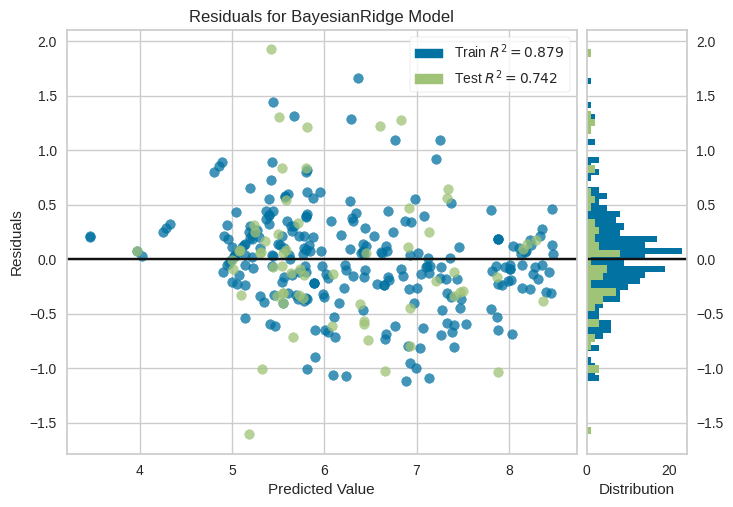

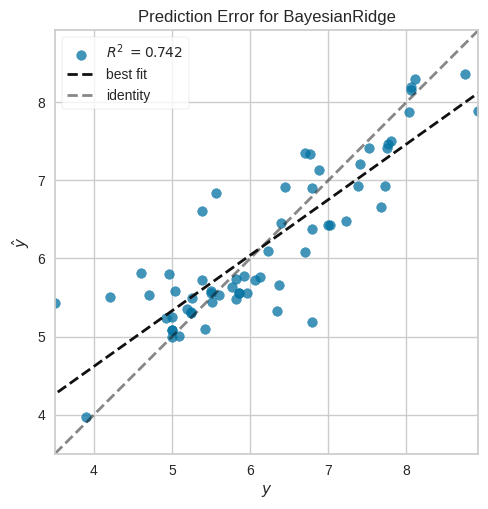

In [64]:
print(br)

plot_model(br, 'residuals')

plot_model(br, 'error')


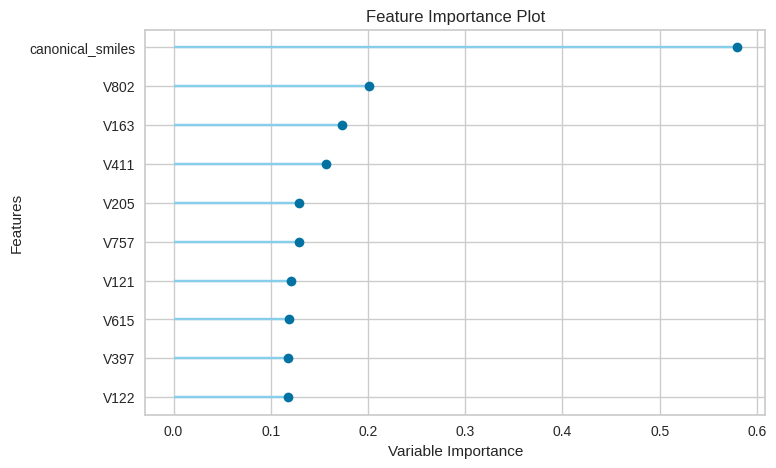

In [65]:
plot_model(br, 'feature')

In [76]:
prediction_holdout = predict_model(br)

prediction_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.4430,0.3716,0.6096,0.7422,0.0917,0.0770


,canonical_smiles,V5,V6,V7,V8,V9,V10,V11,V12,V13,...,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,pIC50,prediction_label
123,CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)c(CC(=O...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.602060,5.812301
219,COCCn1c(CNc2cccc(C(=O)NCc3ccccc3)c2)nnc1-c1ccncc1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.795880,7.503457
183,Cc1cnccc1-c1n[nH]c(CNc2cccc(C(=O)NCc3ccccc3)c2)n1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,7.376751,6.929357
23,Nc1ncc(-c2cnn(C3CCNCC3)c2)cc1-c1nc2ccc(NC(=O)c...,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,5.494850,5.579934
107,CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)c(C(=O)...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.698970,6.084970


In [77]:
header = ["canonical_smiles", "pIC50", "prediction_label"]
prediction_holdout.to_csv('holdout_prediction_data_raw.csv', index=False, columns = header)


In [78]:
! cat holdout_prediction_data_raw.csv

canonical_smiles,pIC50,prediction_label
CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)c(CC(=O)NCc3c(C)cccc3C)c2)NC(=O)N1,4.60206,5.812300857687879
COCCn1c(CNc2cccc(C(=O)NCc3ccccc3)c2)nnc1-c1ccncc1,7.79588,7.503457221256539
Cc1cnccc1-c1n[nH]c(CNc2cccc(C(=O)NCc3ccccc3)c2)n1,7.376751,6.929357461978175
Nc1ncc(-c2cnn(C3CCNCC3)c2)cc1-c1nc2ccc(NC(=O)c3ccc(C(F)(F)F)cc3)cc2o1,5.49485,5.579934068204585
CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)c(C(=O)NCc3cccc(F)c3)c2)NC(=O)N1,6.69897,6.084969998082633
Cl.Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1,5.60206,5.537370669299809
CC(C)(Nc1ccc(Cl)c(C(=O)NCCCC(=O)O)c1)C(=O)Nc1nc2c(C(F)(F)F)cc3[nH]ncc3c2s1,8.113509,8.291631526063206
CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)c(CC(=O)N3CCOC(CCO)C3)c2)NC(=O)N1,5.823909,5.485806146442818
COC(=O)c1ccc(/C=C/c2ccc([N+](=O)[O-])o2)o1,3.8996294,3.9731478506572233
CCCn1c(CNc2cccc(C(=O)NCc3c(F)cccc3F)c2)nnc1-c1ccncn1,8.920818,7.886989007248412
CCc1cc(Nc2nc(N[C@@H](C)c3ccc(F)cn3)nc3cccc(OC)c23)n[nH]1,5.0,5.077463500302489
Cn1cc

In [68]:
drugdata_url = 'https://raw.githubusercontent.com/dlarsson2000/ML4BiotechProject/main/drug_phaseIV_fp_data.csv'
dataset2 = pd.read_csv(drugdata_url)
dataset2.drop('max_phase', axis = 1, inplace = True)
dataset2.drop('chembl_id', axis = 1, inplace = True)

In [69]:
# predict on new data
prediction_newdata = predict_model(br, data = dataset2)
prediction_newdata.head()


,canonical_smiles,name,V5,V6,V7,V8,V9,V10,V11,V12,...,V1020,V1021,V1022,V1023,V1024,V1025,V1026,V1027,V1028,prediction_label
0,O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al...,MAGALDRATE,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.814367
1,CC12CC3CC(C)(C1)CC(N)(C3)C2,MEMANTINE,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4.931182
2,CN/C(=N\CCSCc1nc[nH]c1C)NC#N,CIMETIDINE,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.514367
3,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,TRIDIHEXETHYL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.106009
4,Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,SULFISOXAZOLE,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.992681


In [72]:
header = ["canonical_smiles", "name", "prediction_label"]
prediction_newdata.to_csv('prediction_newdata_raw.csv', index=False, columns = header)



In [74]:
! cat prediction_newdata_raw.csv

canonical_smiles,name,prediction_label
O=S(=O)([O-])[O-].O=S(=O)([O-])[O-].[Al+3].[Al+3].[Al+3].[Al+3].[Al+3].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[Mg+2].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-].[OH-],MAGALDRATE,4.814366902303092
CC12CC3CC(C)(C1)CC(N)(C3)C2,MEMANTINE,4.9311819035272935
CN/C(=N\CCSCc1nc[nH]c1C)NC#N,CIMETIDINE,4.514367113884458
CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,TRIDIHEXETHYL,5.106008983595841
Cc1noc(NS(=O)(=O)c2ccc(N)cc2)c1C,SULFISOXAZOLE,4.99268111845095
O=[Si](O)O[Si](O)(O)O[Si](=O)O,TRISILICATE,4.795767971690351
CN1CCC[C@H]1c1cccnc1,NICOTINE,5.1353274780948475
CC[N+](C)(CC)CCOC(=O)C(O)(c1ccccc1)C1CCCCC1,OXYPHENONIUM,5.4554380857806
CC(C)(NC(=O)C1=C(O)[C@@H]2Oc3c(O)ccc4c3[C@@]23CCN(CC2CC2)[C@H](C4)[C@]3(O)C1)c1nc(-c2ccccc2)no1,NALDEMEDINE,6.104515008148407
CC(C)NCC(O)c1cc(O)cc(O)c1.CC(C)NCC(O)c1cc(O)cc